In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
from sklearn.datasets import load_digits
data = load_digits()
X_tot,Y_tot = load_digits().data,load_digits().target

In [8]:
len(X_tot)

1797

In [9]:
split = 500
X = X_tot[:split]
Y = Y_tot[:split]
X_test = X_tot[split:]
Y_test = Y_tot[split:]

In [10]:
from scipy.spatial.distance import pdist,squareform

In [11]:
# stochastic neighbor assignments
def stoch_neighbor_assignments(X):
    P = squareform(np.exp(-(pdist(X)**2)))
    P -= np.diag(P)
    return np.nan_to_num(P/P.sum(1)) # columns sum to 1

In [62]:
P = squareform(np.exp(-(pdist(X)**2)))
P -= np.diag(P)
sum(P.sum(1)==0)

8

In [12]:
P = stoch_neighbor_assignments(X)
np.sum(P != 0)

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


6912

In [13]:
np.max(P),np.min(P)

(1.0, 0.0)

In [14]:
np.sum(np.nan_to_num(P)!=0)

6912

<matplotlib.colorbar.Colorbar instance at 0x110fdb2d8>

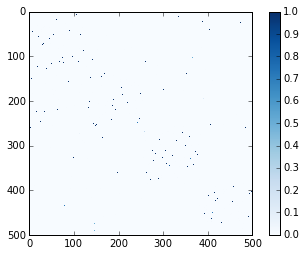

In [15]:
plt.imshow(P,interpolation='none',cmap='Blues')
plt.colorbar()

In [16]:
# probability that point 0 will be classified correctly
sum(P.T[10,Y==Y[10]])

1.0

In [17]:
def correct_classification_prob(P,Y):
    p = np.array([sum(P.T[i,Y==Y[i]]) for i in range(len(P))])
    return p

In [18]:
def correct_classification_prob_vec(P,Y):
    Y_ = np.vstack([Y==y for y in Y])
    return P[Y_]

In [19]:
def exp_class_accuracy_vectorized(P,Y):
    Y_ = np.vstack([Y==y for y in Y])
    return P[Y_].sum()/len(Y)

In [20]:
%timeit sum(correct_classification_prob(P,Y))

100 loops, best of 3: 5.62 ms per loop


In [21]:
sum(correct_classification_prob(P,Y))

487.73105857862811

In [22]:
%timeit correct_classification_prob_vec(P,Y)

100 loops, best of 3: 2.34 ms per loop


In [23]:
%timeit exp_class_accuracy_vectorized(P,Y)

100 loops, best of 3: 2.38 ms per loop


In [24]:
sum(correct_classification_prob_vec(P,Y))

487.73105857862816

In [25]:
sum(correct_classification_prob_vec(P,Y))/len(Y)

0.97546211715725628

In [26]:
%timeit np.vstack([Y==y for y in Y])

100 loops, best of 3: 2.01 ms per loop


In [27]:
# expected number of points correctly classified
p = correct_classification_prob(P,Y)
correct_class_expectation = sum(p) / len(p)
correct_class_expectation

0.97546211715725617

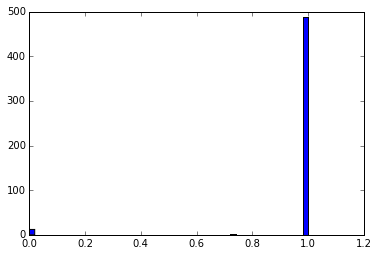

In [28]:
plt.hist(p,bins=50);

In [29]:
sum(p<0.5)

12

In [35]:
outlier_images = data.images[p<0.5]

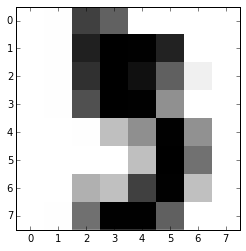

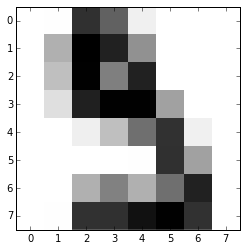

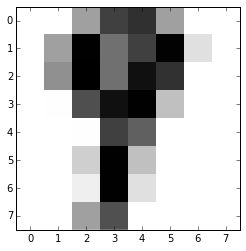

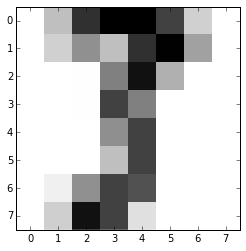

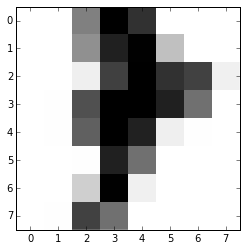

In [36]:
for image in outlier_images[:5]:
    plt.figure()
    plt.imshow(-image,cmap='gray',interpolation='none')

In [37]:
np.argmin(p)

5

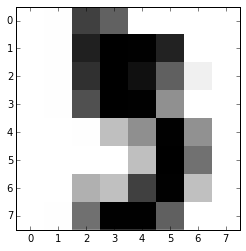

In [38]:
plt.imshow(-data.images[np.argmin(p)],cmap='gray',interpolation='none')

In [39]:
sum(p==1)

439

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_ = pca.fit_transform(X)
X_.shape

(500, 2)

In [41]:
P_ = stoch_neighbor_assignments(X_)
p_ = correct_classification_prob(P_,Y)
correct_class_expectation_ = sum(p_) / len(p_)
correct_class_expectation_

0.66150737689602468

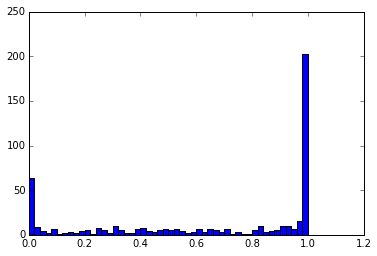

In [42]:
plt.hist(p_,bins=50);

In [43]:
# objective: find a transformation f(X) that 
# maximizes correct_classification_prob(f(X),Y)

In [44]:
A = np.random.randn(2,X.shape[1])

In [45]:
A.dot(X.T).shape

(2, 500)

In [46]:
np.sum(X.dot(A.T) - A.dot(X.T).T)

7.7182704671940883e-13

In [47]:
X.dot(A.T),A.dot(X.T).T

(array([[ -3.18056146e+01,  -2.97813485e+01],
        [ -3.63458015e+01,   8.30585643e+00],
        [ -2.09108800e+01,  -2.33695473e+01],
        [ -4.58936445e+01,  -7.14065100e+01],
        [  2.01026705e+01,  -4.02875781e+01],
        [ -4.31356612e+01,  -8.04194320e+01],
        [  1.45908831e+01,   5.25960781e+01],
        [ -3.43060970e+01,  -1.65129691e+01],
        [ -2.71594422e+01,  -5.58981872e+01],
        [ -1.06302716e+01,  -9.71334128e+00],
        [ -1.34055907e+01,   4.06932982e+00],
        [ -6.48772248e+01,  -9.99818923e+01],
        [  6.17220900e+01,   3.88076286e+01],
        [ -7.87137261e+01,  -1.23885710e+02],
        [  1.79000414e+00,  -1.09516498e+01],
        [  3.70752976e+01,   7.07269605e+01],
        [ -4.62478912e+01,   1.42070942e+01],
        [  7.01626969e+00,  -5.90680303e+00],
        [ -2.03178979e+01,  -6.78746281e+00],
        [ -3.81935518e+01,  -6.23071134e+01],
        [  3.47657549e+00,   6.10867647e+00],
        [ -7.24484063e+01,  -9.124

In [48]:
X_ = X.dot(A.T)
X_.shape

(500, 2)

In [49]:
(A.T).shape

(64, 2)

In [50]:
X.dot(A.T)

array([[ -3.18056146e+01,  -2.97813485e+01],
       [ -3.63458015e+01,   8.30585643e+00],
       [ -2.09108800e+01,  -2.33695473e+01],
       [ -4.58936445e+01,  -7.14065100e+01],
       [  2.01026705e+01,  -4.02875781e+01],
       [ -4.31356612e+01,  -8.04194320e+01],
       [  1.45908831e+01,   5.25960781e+01],
       [ -3.43060970e+01,  -1.65129691e+01],
       [ -2.71594422e+01,  -5.58981872e+01],
       [ -1.06302716e+01,  -9.71334128e+00],
       [ -1.34055907e+01,   4.06932982e+00],
       [ -6.48772248e+01,  -9.99818923e+01],
       [  6.17220900e+01,   3.88076286e+01],
       [ -7.87137261e+01,  -1.23885710e+02],
       [  1.79000414e+00,  -1.09516498e+01],
       [  3.70752976e+01,   7.07269605e+01],
       [ -4.62478912e+01,   1.42070942e+01],
       [  7.01626969e+00,  -5.90680303e+00],
       [ -2.03178979e+01,  -6.78746281e+00],
       [ -3.81935518e+01,  -6.23071134e+01],
       [  3.47657549e+00,   6.10867647e+00],
       [ -7.24484063e+01,  -9.12444381e+01],
       [  

In [51]:
def objective(A,X,Y):
    assert(X.shape[1]==A.shape[0])
    X_ = X.dot(A)
    P_ = stoch_neighbor_assignments(X_)
    #p_ = correct_classification_prob(P_,Y)
    #correct_class_expectation_ = sum(p_) / len(p_)
    #return correct_class_expectation_
    return exp_class_accuracy_vectorized(P_,Y)

In [52]:
A = npr.randn(64,2)

In [53]:
objective(A,X,Y)

0.29509658631114022

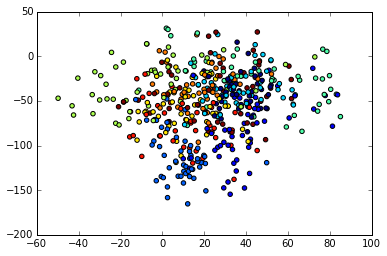

In [54]:
plt.scatter(X.dot(A)[:,0],X.dot(A)[:,1],c=Y)

In [55]:
%timeit objective(A,X,Y)

100 loops, best of 3: 9.05 ms per loop


In [56]:
%prun objective(A,X,Y)

In [276]:
# for large inputs, use ball-trees instead of computing the full P_ij matrix

In [57]:
# construct a function we can pass to scipy optimize
def objective_vec(A):
    A_ = np.reshape(A,(X.shape[1],2))
    return objective(A_,X,Y)

In [58]:
A = npr.randn(X.shape[1]*2)
A_ = np.reshape(A,(X.shape[1],2))
A_.shape

(64, 2)

In [59]:
objective_vec(npr.randn(64*2))

/Users/joshuafass/anaconda/envs/py27/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


0.37512276719190729

In [303]:
from scipy.optimize import minimize,basinhopping

In [296]:
A_init = pca.components_.T
A_init.shape

(64, 2)

In [298]:
objective(A_init,X,Y)

0.58038054627365865

In [299]:
A_init_vec = np.reshape(A_init,np.prod(A_init.shape))

In [301]:
obj_min = lambda A:-objective_vec(A)

In [306]:
obj_min(A_init_vec)

-0.58038054627365865

In [307]:
res = minimize(obj_min,A_init_vec,options={'maxiter':2,'disp':True})

KeyboardInterrupt: 

In [310]:
def gradient(func,x0,h=0.001):
    x0 = np.array(x0)#,dtype=float)
    y = func(x0)
    deriv = np.zeros(len(x0))
    for i in range(len(x0)):
        x = np.array(x0)
        x[i] += h
        deriv[i] = (func(x) - y)/h
    return deriv

In [311]:
%timeit obj_min(A_init_vec)

1 loops, best of 3: 167 ms per loop


In [312]:
len(A_init_vec)

128

In [313]:
gradient(obj_min,A_init_vec)

KeyboardInterrupt: 

In [ ]:
def obj_grad(A,X,Y)

In [ ]:
def gradient(A,X,Y):
    X_ = X.dot(A)
    P_ = stoch_neighbor_assignments(X_)
    s = 0
    for i in range(len(X_)):
        s+=
    return 

In [302]:
res = basinhopping(obj_min,A_init_vec,disp=True)

KeyboardInterrupt: 

In [308]:
from scipy.optimize import minimize, rosen, rosen_der

In [309]:
x0 = [1.3, 0.7, 0.8, 1.9, 1.2]
res = minimize(rosen, x0, method='Nelder-Mead')
res.x

array([ 0.99910115,  0.99820923,  0.99646346,  0.99297555,  0.98600385])

In [63]:
from autograd import grad
import autograd.numpy as np

In [64]:
grad(objective_vec)(npr.randn(64*2))

TypeError: float() argument must be a string or a number